<a href="https://colab.research.google.com/github/Bhagat-Atul/Document-Classification/blob/main/IndoMLDatathon_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount and Install the Google Drive where all the files are placed!

Make sure the json from the kagggle is downloaded and is placed at the drive location

In [1]:
from google.colab import drive
drive.mount('/content/drive')

! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/IndoML/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c datathonindoml-2022

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 1.51G/1.51G [00:12<00:00, 137MB/s]
100% 1.51G/1.51G [00:12<00:00, 125MB/s]


In [2]:
!unzip /content/datathonindoml-2022.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/train/6309.tif    
  inflating: train/train/631.tif     
  inflating: train/train/6310.tif    
  inflating: train/train/6311.tif    
  inflating: train/train/6312.tif    
  inflating: train/train/6313.tif    
  inflating: train/train/6314.tif    
  inflating: train/train/6315.tif    
  inflating: train/train/6316.tif    
  inflating: train/train/6317.tif    
  inflating: train/train/6318.tif    
  inflating: train/train/6319.tif    
  inflating: train/train/632.tif     
  inflating: train/train/6320.tif    
  inflating: train/train/6321.tif    
  inflating: train/train/6322.tif    
  inflating: train/train/6323.tif    
  inflating: train/train/6324.tif    
  inflating: train/train/6325.tif    
  inflating: train/train/6326.tif    
  inflating: train/train/6327.tif    
  inflating: train/train/6328.tif    
  inflating: train/train/6329.tif    
  inflating: train/train/633.tif     
  inflating: train/train/6330.tif    

In [3]:
import pandas as pd
import os 
labels = pd.read_csv("/content/train_labels.csv")
os.mkdir("./Data")


In [ ]:
for i in range(0,16):
    os.mkdir("/content/Data/{}".format(i), 0o666)

In [ ]:
import shutil
for row in labels.iterrows():
      try:
        # print(row[1][1])
        shutil.copyfile(f"/content/train/train/{row[1][0]}.tif", f"/content/Data/{(row[1][1])}/{row[1][0]}.tif")
        # break
      except:
        print("error{}".format(row[1][0]))
        continue

In [ ]:
import tensorflow as tf
import os 
import numpy as np
from matplotlib import pyplot as plt


## Load Data

In [ ]:
#Image Size
i_s = 256

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.0,
                                  zoom_range = [0,2],
                                  horizontal_flip = True,
                                  vertical_flip=True,
                                  rotation_range=5,
                                  fill_mode='nearest',
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  validation_split=0.2  
                                  )

clas = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

train = train_datagen.flow_from_directory('/content/Data', batch_size=32, target_size=(i_s,i_s),
                                         color_mode="grayscale",
                                         classes = clas,
                                         class_mode = 'sparse',
                                         shuffle = True,
                                         subset='training')
val = train_datagen.flow_from_directory('/content/Data', target_size=(i_s,i_s),
                                         color_mode="grayscale",
                                         classes = clas,
                                         class_mode = 'sparse',
                                         shuffle = True,
                                         subset='validation')
# test = train_datagen.flow_from_directory('./ANN/data/testlabeled', target_size=(i_s,i_s),
#                                          color_mode="grayscale",
#                                          classes = clas,
#                                          class_mode = 'sparse',
#                                          shuffle = True,
#                                          subset='training')






Found 12807 images belonging to 16 classes.
Found 3193 images belonging to 16 classes.


### Model Definition 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Layer, AveragePooling2D, Input, Add, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras import layers


### Basic CNN - 7 Convolution Layers, With MaxPooling, and Dropout - 3 Fully Connected Layers

In [ ]:

model = Sequential()

model.add(Conv2D(96, (11, 11), 4, 
                 activation="relu",
                 input_shape=(i_s,i_s,1)))

model.add(MaxPooling2D(pool_size=3, strides=2)) 

model.add(Conv2D(256, (5,5), 1, 
                 activation="relu",
                 padding='same', 
                 input_shape=(i_s,i_s,1)))

model.add(MaxPooling2D(pool_size=3, strides=2)) 

model.add(Conv2D(384, (3,3), 1, 
                 activation="relu",
                 padding='same', 
                 input_shape=(i_s,i_s,1)))

model.add(Conv2D(384, (3,3), 1, 
                 activation="relu",
                 padding='same', 
                 input_shape=(i_s,i_s,1)))

model.add(layers.Dropout(rate=0.5))

model.add(Conv2D(512, (5,5), 1, 
                 activation="relu",
                 padding='same', 
                 input_shape=(i_s,i_s,1)))

model.add(MaxPooling2D(pool_size=3, strides=2)) 

model.add(Conv2D(512, (3,3), 1, 
                 activation="relu",
                 padding='same', 
                 input_shape=(i_s,i_s,1)))

# model.add(MaxPooling2D(pool_size=3, strides=1))

model.add(Conv2D(256, (3,3), 1, 
                 activation="relu",
                 padding='same', 
                 input_shape=(i_s,i_s,1)))

model.add(MaxPooling2D(pool_size=2, strides=2)) 

model.add(layers.Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(4096, activation="relu"))

model.add(layers.Dropout(rate=0.5))

model.add(Dense(2048, activation="relu"))

model.add(Dense(16, activation='softmax'))

# lr = 0.002
# SGD(learning_rate=lr, momentum=0.9, decay=0,nesterov=False

adam = tf.keras.optimizers.Adam(learning_rate=.0001)

model.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer=adam,  metrics=['accuracy'])

model.summary()


### VGC19 Architecture Block

In [ ]:
model_name = "VGC19"

model = Sequential()

model.add(Conv2D(64, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1)))
model.add(Conv2D(64, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1)))

model.add(MaxPooling2D(pool_size=2, strides=2)) 


model.add(Conv2D(128, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1)))
model.add(Conv2D(128, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1)))
model.add(MaxPooling2D(pool_size=2, strides=2)) 


model.add(Conv2D(256, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(256, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(256, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(256, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=2, strides=2)) 


model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=2, strides=2)) 

model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(Conv2D(512, (3, 3), 1,
                 activation="relu",
                 input_shape=(i_s,i_s,1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=2, strides=2)) 

model.add(Flatten())

model.add(Dense(4096, activation="relu"))
model.add(layers.Dropout(rate=0.2))

model.add(Dense(4096, activation="relu"))
model.add(layers.Dropout(rate=0.2))

model.add(Dense(16, activation='softmax'))

# lr = 0.002
# SGD(learning_rate=lr, momentum=0.9, decay=0,nesterov=False

adam = tf.keras.optimizers.Adam(learning_rate=.00001)

model.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer=adam,  metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 254, 254, 64)      640       
                                                                 
 conv2d_73 (Conv2D)          (None, 252, 252, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_74 (Conv2D)          (None, 124, 124, 128)     73856     
                                                                 
 conv2d_75 (Conv2D)          (None, 122, 122, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                    

### ResNet Architecture

In [ ]:
model_name = "Resnet34WithImageSize " + str(i_s)


def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_input = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_input])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

  
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_input = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=1)(x)
    # Processing Residue with conv(1,1)
    x_input = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_input)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_input])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet34(shape = (i_s, i_s, 1), classes = 16):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation = 'relu')(x)
    x = tf.keras.layers.Dense(4096, activation = 'relu')(x)
    x = tf.keras.layers.Dense(1000, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model = ResNet34()
model.summary()

## TRAINING

In [ ]:
logdir='TrainingLogs - ' + str(model_name)
import random
from tensorflow.keras.callbacks import ModelCheckpoint
model_cp = ModelCheckpoint(filepath=f"/content/drive/MyDrive/IndoML/model/{model_name}.h5", 
                           monitor="val_loss", 
                           save_best_only=True,
                           verbose=1)

In [ ]:
tensorboard_callback = [tf.keras.callbacks.TensorBoard(log_dir=logdir), 
                        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'), 
                        model_cp
                        ]

In [ ]:
model.compile(tf.keras.optimizers.SGD(learning_rate=1e-3), 
              tf.keras.losses.sparse_categorical_crossentropy,  
              metrics=["accuracy", "mse"])

hist = model.fit(train,
                 epochs = 100,
                 validation_data = val,
                 shuffle=True,
                 callbacks = tensorboard_callback)



Epoch 1/100
401/401 [==============================] - ETA: 0s - loss: 2.5734 - accuracy: 0.1824 - mse: 76.6726
Epoch 1: val_loss did not improve from 2.43358
401/401 [==============================] - 117s 283ms/step - loss: 2.5734 - accuracy: 0.1824 - mse: 76.6726 - val_loss: 2.5925 - val_accuracy: 0.1610 - val_mse: 76.6934
Epoch 2/100
401/401 [==============================] - ETA: 0s - loss: 2.3952 - accuracy: 0.2189 - mse: 76.6723
Epoch 2: val_loss did not improve from 2.43358
401/401 [==============================] - 113s 281ms/step - loss: 2.3952 - accuracy: 0.2189 - mse: 76.6723 - val_loss: 2.5116 - val_accuracy: 0.1951 - val_mse: 76.6930
Epoch 3/100
401/401 [==============================] - ETA: 0s - loss: 2.3284 - accuracy: 0.2437 - mse: 76.6730
Epoch 3: val_loss did not improve from 2.43358
401/401 [==============================] - 113s 282ms/step - loss: 2.3284 - accuracy: 0.2437 - mse: 76.6730 - val_loss: 2.5853 - val_accuracy: 0.1629 - val_mse: 76.6939
Epoch 4/100
401/

### Evaluate Loaded Models

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
loaded_model = load_model(os.path.join('models', 'Bestmodel.h5'))
adam = tensorflow.keras.optimizers.Adam(learning_rate=1e-6)
sgd = tensorflow.keras.optimizers.SGD(learning_rate=1e-4)
loaded_model.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer=sgd,  metrics=['accuracy'])


In [ ]:
hist = loaded_model.fit(train,
                        epochs = 160,
                        validation_data = val,
                        shuffle=True,
                        callbacks=[tensorboard_callback])


## PLOT Performance

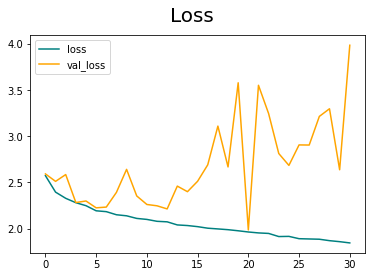

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

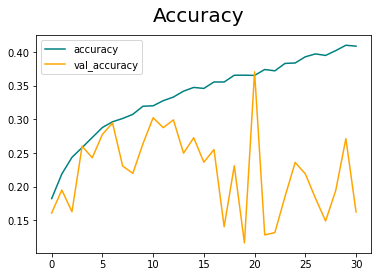

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [ ]:
model.evaluate(test)

## Saving the Model


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save(os.path.join('models','CNN_final_Model_42%.h5'))

In [ ]:
new_model = load_model(os.path.join('models','documentclassifier_v4.1_3x3Filter(128x128).h5'))


## Testing Model

In [ ]:
import cv2
img = cv2.imread('./data/val_jpeg/17865.jpeg')
plt.imshow(img)
plt.show()


In [ ]:
resize = tf.image.resize(img, (i_s,i_s))
gray_image = tf.image.rgb_to_grayscale(resize, (i_s,i_s))
plt.imshow(gray_image.numpy())
plt.show()
  

In [ ]:
yhat = model.predict(np.expand_dims(gray_image/255, 0))



In [ ]:
yhat

In [ ]:
new=[]
yhat_n=np.array(new)
yhat_n.resize(len(yhat),)
for i in range(len(yhat)):
    yhat_n[i]=int(np.argmax(yhat[i][:]))

In [ ]:
yhat_n[0]

In [ ]:
# Avoid OutOfMemory Error - 
# Otherwise, TF will use all the available GPU VRAM

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
